# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Question 1: Is the distribution of body temperatures normal?

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [22]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1,n+1)/n
    
    return x,y

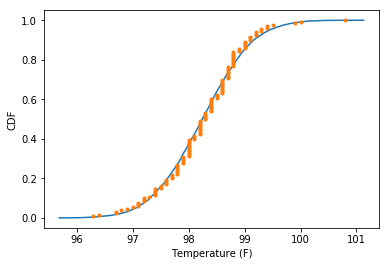

In [24]:
temp = df['temperature']

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp)
sigma = np.std(temp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(temp)

# Plot the PDFs and show the plot
plt.plot(x_theor,y_theor)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('Temperature (F)')
plt.ylabel('CDF')
plt.show()

#### Answer: THIS SAMPLE of Body Temperature is normally distributed

### Question 2: Is the sample size large? Are the observations independent?

Answer: Sample size n = 130 > 30 -- large enough

        Observations are independent

### Question 3: Is the true population mean really 98.6 degrees F?

* First, try a bootstrap hypothesis test.

* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

* In this situation, is it appropriate to use the t or  𝑧 statistic?

* Now try using the other test. How is the result be different? Why?

#### First, try a bootstrap hypothesis test

p value =  0.0

Mean of initial temp sample =  98.24923076923078
Propose value =  98.6
difference from proposed value =  -0.35076923076921673

Temp_shifted
Mean =  98.59999999999992

Bootstrap Replicates
Mean =  0.00015594615383920227
STD =  0.06410105912844825


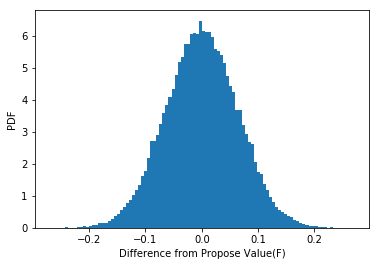

In [29]:
# Bootstrap hypothesis test
# Ho : the true population mean is 98.6 degrees F
# Ha : the true population mean is different from 98.6 degrees F
# Significant level: alpha = 0.05

# Bootstrap Replicates Function
def draw_bs_reps(data,func,size=1):
    """Draw bootstrap replicates"""
    
    #Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data,size=len(data)))
        
    return bs_replicates

# Shifting our sample of body temperature
propose_value = 98.6
temp_shifted = temp - np.mean(temp) + propose_value

# Our test statistics is the difference between mean of bootstrap samples
# and propose_value

def diff_value(data,propose_value=98.6):
    return np.mean(data) - propose_value

diff_obs = diff_value(temp)

# Take 10,000 bootstrap replicates of the mean:
bs_replicates = draw_bs_reps(temp_shifted,diff_value,size = 100000)

p_value = np.sum(bs_replicates <= diff_obs)/100000

print('p value = ',p_value)
print('')

# Test
print('Mean of initial temp sample = ',np.mean(temp))
print('Propose value = ',propose_value)
print('difference from proposed value = ',diff_obs)
print('')

print('Temp_shifted')
print('Mean = ', np.mean(temp_shifted))
print('')

print('Bootstrap Replicates')
print('Mean = ',np.mean(bs_replicates))
print('STD = ',np.std(bs_replicates))

# Make a histogram of the results
plt.hist(bs_replicates, bins = 100, density = True)
plt.xlabel('Difference from Propose Value(F)')
plt.ylabel('PDF')
plt.show()

**Answer :** The p_value is very small, thus we can reject the null hypothesis that the true population mean is 98.6 degree F

#### Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

Here we would use a one-sample test, because we compare 1 set of data to a single value.


#### In this situation, is it appropriate to use the t or 𝑧 statistic?

Here we are working with sample mean. Since the sample size is larger than 30, I would use z statistic with estimated standard error, as the population standard deviation is not known.

In [31]:
# z-score test

# Hypothesis
# Ho : the true population mean is 98.6 degrees F
# Ha : the true population mean is different from 98.6 degrees F
# Significant level: alpha = 0.05

# Calculate standard error of the sampling distribution of the sample mean
std_sample = np.std(temp)*np.sqrt(len(temp)/(len(temp)-1)) # we need to divide by (n-1) when calculating the sample standard deviation
se = std_sample/np.sqrt(len(temp))

# Calculate z-score
z_score = (np.mean(temp) - propose_value)/se
print('z-score = ',z_score)

z-score =  -5.454823292364079


**Answer :** P(z <= -5.4548) approximates zero and smaller than our significant level, so we reject the null hypothesis. True population mean is different from 98.6 F

### Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

* Which one is the correct one to use?

* What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [41]:
# Draw a small sample of size 10 from the data
sml_sample = np.random.choice(temp,size=10,replace=True)
print(sml_sample)

# Calculate standard error of the sampling distribution of the sample mean
std_sml_sample = np.std(sml_sample)*np.sqrt(len(sml_sample)/(len(sml_sample)-1))
se_sml_sample = std_sml_sample/np.sqrt(len(sml_sample))

# Calculate z-score
z_score_sml = (np.mean(sml_sample)-propose_value)/se_sml_sample
print('z-score when using a small sample = ',z_score_sml)
print('')

# Calculate t-score
t_score_sml = (np.mean(sml_sample)-propose_value)/se_sml_sample
print('t-score when using a small sample = ',t_score_sml)

[ 97.4  97.9  98.2  99.4  96.8  98.6  98.4 100.8  97.4  97.4]
z-score when using a small sample =  -0.9983806968568399

t-score when using a small sample =  -0.9983806968568399


* z-score = -0.99
  Probability (z <= -0.99) = 0.5 - 0.3389 = 0.1611 > Significant level (5%)
  
  We cannot reject the null hypothesis in this case.


* t-score = -0.99, n = 10, df = n - 1 = 9
  We have: 
          t = 1.1; one-tail = 0.15 (df = 9)
          t = 0.883; one-tail = 0.2 (df = 9)
  Probability (t <= -0.99) = Probability (t >= 0.99) > Probability (t >= 1.1) = 0.15 
  
  Thus p-value > Significant level (5%)
  
  We also cannot reject the null hypothesis in this case.


**Answer :**

* For this small sample size (<30), t-statistic test is the correct one to use. 


* Both t test and z test give the same z-score and t-score. Their corresponding p-values are supposed to be slightly different, though it is not obvious here. However, in both 2 tests, we fail to reject the null hypothesis.


* The sample size is too small, making this result not repeatable.

### Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

#### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

Temperature is considered to be abnormal if it is outside of this range:  [98.12384615 98.37461538]


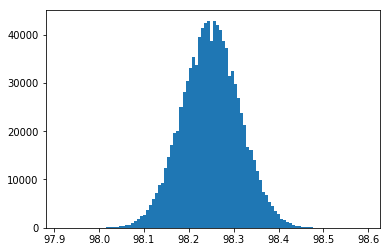

In [43]:
# Bootstrap approach

# Create bootstrap replicates with sample mean
bs_replicates_mean = draw_bs_reps(temp,np.mean,size = 1000000)

conf_int = np.percentile(bs_replicates_mean,[2.5,97.5])

print('Temperature is considered to be abnormal if it is outside of this range: ', conf_int)

plt.hist(bs_replicates_mean,bins=100)
plt.show()

In [45]:
# Frequentist approach
# 95% confidence interval with z statistics 
x_bar_max = np.mean(temp) + 1.96*se
x_bar_min = np.mean(temp) - 1.96*se
conf = np.array([x_bar_min,x_bar_max])
print('Temperature is considered to be abnormal if it is outside of this range: ',conf)

Temperature is considered to be abnormal if it is outside of this range:  [98.12319411 98.37526743]


In [46]:
print('mean of bs = ',np.mean(bs_replicates_mean))
print('mean of temp = ',np.mean(temp))

mean of bs =  98.24929993230774
mean of temp =  98.24923076923078


### Question 6: Is there a significant difference between males and females in normal temperature?
#### What testing approach did you use and why?

Permutate data of males and females. If there is no significant difference between these two groups, we should be able to obtain similar value of difference in the means of these two groups after permutation.


#### Write a story with your conclusion in the context of the original problem.


#### Hypothesis Testing

Ho: there is no significant difference between males and females in normal temperature

Ha: there is difference

Significant level: 5%

Observed difference =  0.289230769230727
Mean value of permutation replicates distribution =  -0.0005718769230769268
p-value = 0.01202


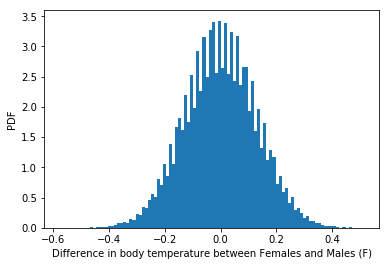

In [47]:
# Define permutation function
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

# Define permutation replicates function
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Generate males & females array
male_temp = df.loc[df['gender']=='M']['temperature']
female_temp = df.loc[df['gender']=='F']['temperature']

# Define difference of means function
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Observed difference in mean temperature between male & female
gen_diff_means = diff_of_means(female_temp,male_temp)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(female_temp, male_temp,
                                 diff_of_means, size=100000)

# Compute p-value: p
p = np.sum(perm_replicates >= gen_diff_means) / len(perm_replicates)

# Print the result
print('Observed difference = ',gen_diff_means)
print('Mean value of permutation replicates distribution = ',np.mean(perm_replicates))
print('p-value =', p)


# Plot the result
plt.clf()
plt.hist(perm_replicates,bins=100,density='True')
plt.xlabel('Difference in body temperature between Females and Males (F)')
plt.ylabel('PDF')
plt.show()

#### Answer: 

p-value is **smaller** than the significant level, so we **reject** the null hypothesis. There **is** significant difference between males and females in normal temperature

### Write a story with your conclusion in the context of the original problem.

#### Body temperature is normally distributed.

#### The mean normal body temperature is **NOT** 37 C or 98.6 F. This is not statistically correct.

#### Temperature is considered to be abnormal if it is outside of this range:  [98.12319411, 98.37526743]

#### There is significant difference between males and females in normal temperature.